# 乳癌資料庫預測SVM分類
>使用scikit-learn 機器學習套件裡的SVR演算法

* (一)引入函式庫及內建乳癌資料集<br>
引入之函式庫如下<br>
sklearn.datasets: 用來匯入內建之乳癌資料集`datasets.load_breast_cancer()`<br>
sklearn.SVR: 支持向量機回歸分析之演算法<br>
matplotlib.pyplot: 用來繪製影像

In [47]:
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Step1. 下載資料

In [48]:
breast_cancer=datasets.load_breast_cancer()

In [49]:
features = breast_cancer.data
target= breast_cancer.target


In [96]:
malignant2 =np.c_[ features[labels=='malignant',20],features[labels=='malignant',29]]
#malignant3 = (np.max(malignant2)-np.array(malignant2))/(np.max(malignant2)-np.min(malignant2)) 
benign2 = np.c_[features[labels=='benign',20], features[labels== 'benign',29]]
#benign3 = (np.max(benign2)-np.array(benign2))/(np.max(benign2)-np.min(benign2)) 
malignant2.shape

(212, 2)

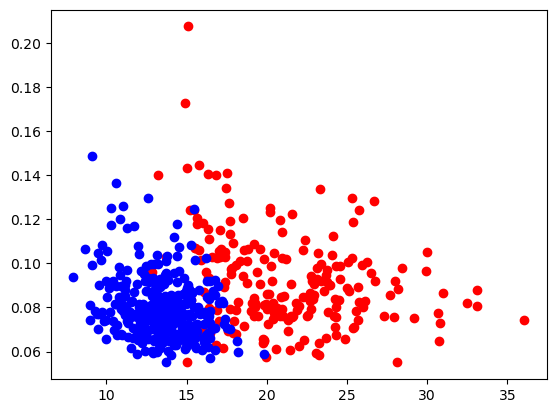

In [97]:
#plt.scatter(malignant_reduce[:,0],malignant_reduce[:,1], color ='red')
#plt.scatter(benign_reduce[:,0],benign_reduce[:,1],color='blue')

plt.scatter(malignant2[:,0],malignant2[:,1], color ='red')
plt.scatter(benign2[:,0],benign2[:,1],color='blue')



In [98]:
#training_data = np.r_[malignant_reduce, benign_reduce]
#training_labels = np.r_[np.zeros(len(malignant_reduce)), np.ones(len(benign_reduce))]
#print (training_data.shape)
training_data = np.r_[malignant2, benign2]
training_labels = np.r_[np.zeros(len(malignant2)), np.ones(len(benign2))]
print (training_data.shape)

(569, 2)


In [103]:

clf=svm.SVR(kernel='rbf', gamma = 'auto', C=1)

clf.fit(training_data,training_labels)

SVR(C=1, gamma='auto')

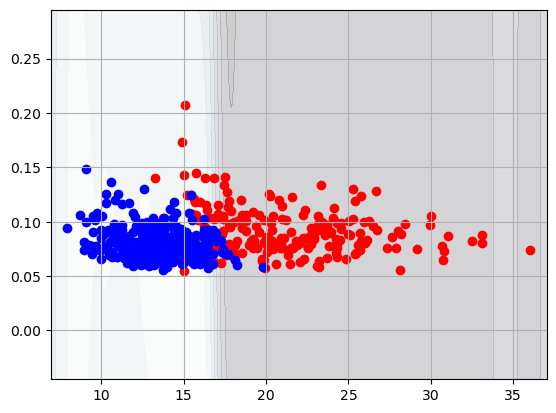

In [107]:
training_x_min = training_data[:,0].min()-1
training_x_max = training_data[:,0].max()+1
training_y_min = training_data[:,1].min()-0.1
training_y_max = training_data[:,1].max()+0.1
grid_interval = 0.02

xx,yy=np.meshgrid(np.arange(training_x_min,training_x_max,grid_interval),np.arange(training_y_min,training_y_max,grid_interval))
Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)

plt.contourf(xx,yy,Z,cmap=plt.cm.bone, alpha= 0.2)
plt.autoscale()
plt.grid()
plt.scatter(malignant2[:,0],malignant2[:,1],color='red')
plt.scatter(benign2[:,0],benign2[:,1], color='blue')
plt.show()




## Step2. 區分訓練集與測試集

In [122]:

training_data = np.r_[malignant2, benign2]
training_labels = np.r_[np.zeros(len(malignant2)), np.ones(len(benign2))]

x_train, x_test, y_train, y_test=train_test_split(training_data,training_labels, test_size=0.2, random_state=10)




## Step3. 建模

In [123]:
clf=svm.SVR(kernel='rbf', gamma = 'auto', C=1)

clf.fit(x_train,y_train)



SVR(C=1, gamma='auto')

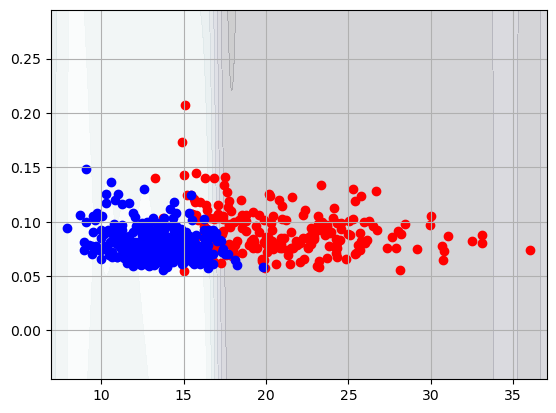

In [124]:
training_x_min = training_data[:,0].min()-1
training_x_max = training_data[:,0].max()+1
training_y_min = training_data[:,1].min()-0.1
training_y_max = training_data[:,1].max()+0.1
grid_interval = 0.02

xx,yy=np.meshgrid(np.arange(training_x_min,training_x_max,grid_interval),np.arange(training_y_min,training_y_max,grid_interval))
Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)

plt.contourf(xx,yy,Z,cmap=plt.cm.bone, alpha= 0.2)
plt.autoscale()
plt.grid()
plt.scatter(malignant2[:,0],malignant2[:,1],color='red')
plt.scatter(benign2[:,0],benign2[:,1], color='blue')
plt.show()

## Step4. 預測

```

```


In [125]:
clf.predict(x_test)

array([0.09979115, 0.90004555, 0.90133523, 0.91294848, 0.46729346,
       0.06373619, 0.89547891, 0.10009941, 0.90103809, 0.9004168 ,
       0.09835897, 0.90723106, 0.06397415, 0.90459054, 0.89135769,
       0.90114095, 0.90011623, 0.90046177, 0.09964014, 0.90008948,
       0.91237053, 0.09999418, 0.90014091, 0.90014183, 0.90170145,
       0.89991618, 0.86112139, 0.90018696, 0.89971068, 0.9004512 ,
       0.19614129, 0.90002828, 0.90619513, 0.90358525, 0.90162782,
       0.91365014, 0.90293827, 0.27463396, 0.91137087, 0.09752119,
       0.90802565, 0.86624159, 0.09832933, 0.90160036, 0.44178898,
       0.09169092, 0.09810858, 0.10005327, 0.38613973, 0.09912362,
       0.9000866 , 0.91530079, 0.09476493, 0.90161411, 0.90020065,
       0.90077001, 0.10017067, 0.90723523, 0.90080393, 0.90063912,
       0.90148255, 0.9005171 , 0.46121441, 0.09988192, 0.90240393,
       0.90176808, 0.90002209, 0.10015582, 0.81762007, 0.10003012,
       0.89989045, 0.90120961, 0.89956345, 0.09302894, 0.90172

## Step5. 準確度分析

In [126]:
print(clf.score(x_train,y_train))
print(clf.score(x_test, y_test))

0.6635046601026773
0.8594912363827155
